**General Rules \& Submission Guidelines**

* Your work should be original and must be completed individually.
* The use of external sources must be properly cited.
* All coding must be done individually, and plagiarism will not be tolerated.
* Late submissions will incur a penalty unless an extension is granted by the instructor.
* Use this template notebook for your answers.
* Your assignment should be submitted as one and only one notebook file (.ipynb). Do not change the name of the file but do not forget to fill your name in the notebook.

# Assignment 1

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below.

In [1]:
student = {
    'name' : "SEYMEN" ,
    'surname' : "CANITEZ",
    
}

print(student)

{'name': 'SEYMEN', 'surname': 'CANITEZ'}


## Part I: Classification Problem
1. The "Rain in Australia" should be downloaded from the Kaggle website https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.
2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]
3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset
characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies. [10 points]
4. Execute data preprocessing to enhance model performance if deemed necessary. This may include handling missing values, encoding categorical
variables, feature scaling, and any other technique that could improve the
results. [5 points]
5. Implement 5-Fold Cross Validation to assess the robustness of your models.
This approach ensures that the evaluation of your model is as accurate as
possible. [5 points]
6. Develop and evaluate models using K-Nearest Neighbors (KNN), Perceptron, and Logistic Regression algorithms. Document the
performance of each model. [30 points]
7. Investigate the outcomes using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]
8. Discuss the results. Reflect on which model yielded the best performance
and hypothesize why this might be the case. Consider the algorithm’s suitability for the data distribution, complexity, and balance of the dataset.
[15 points]


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

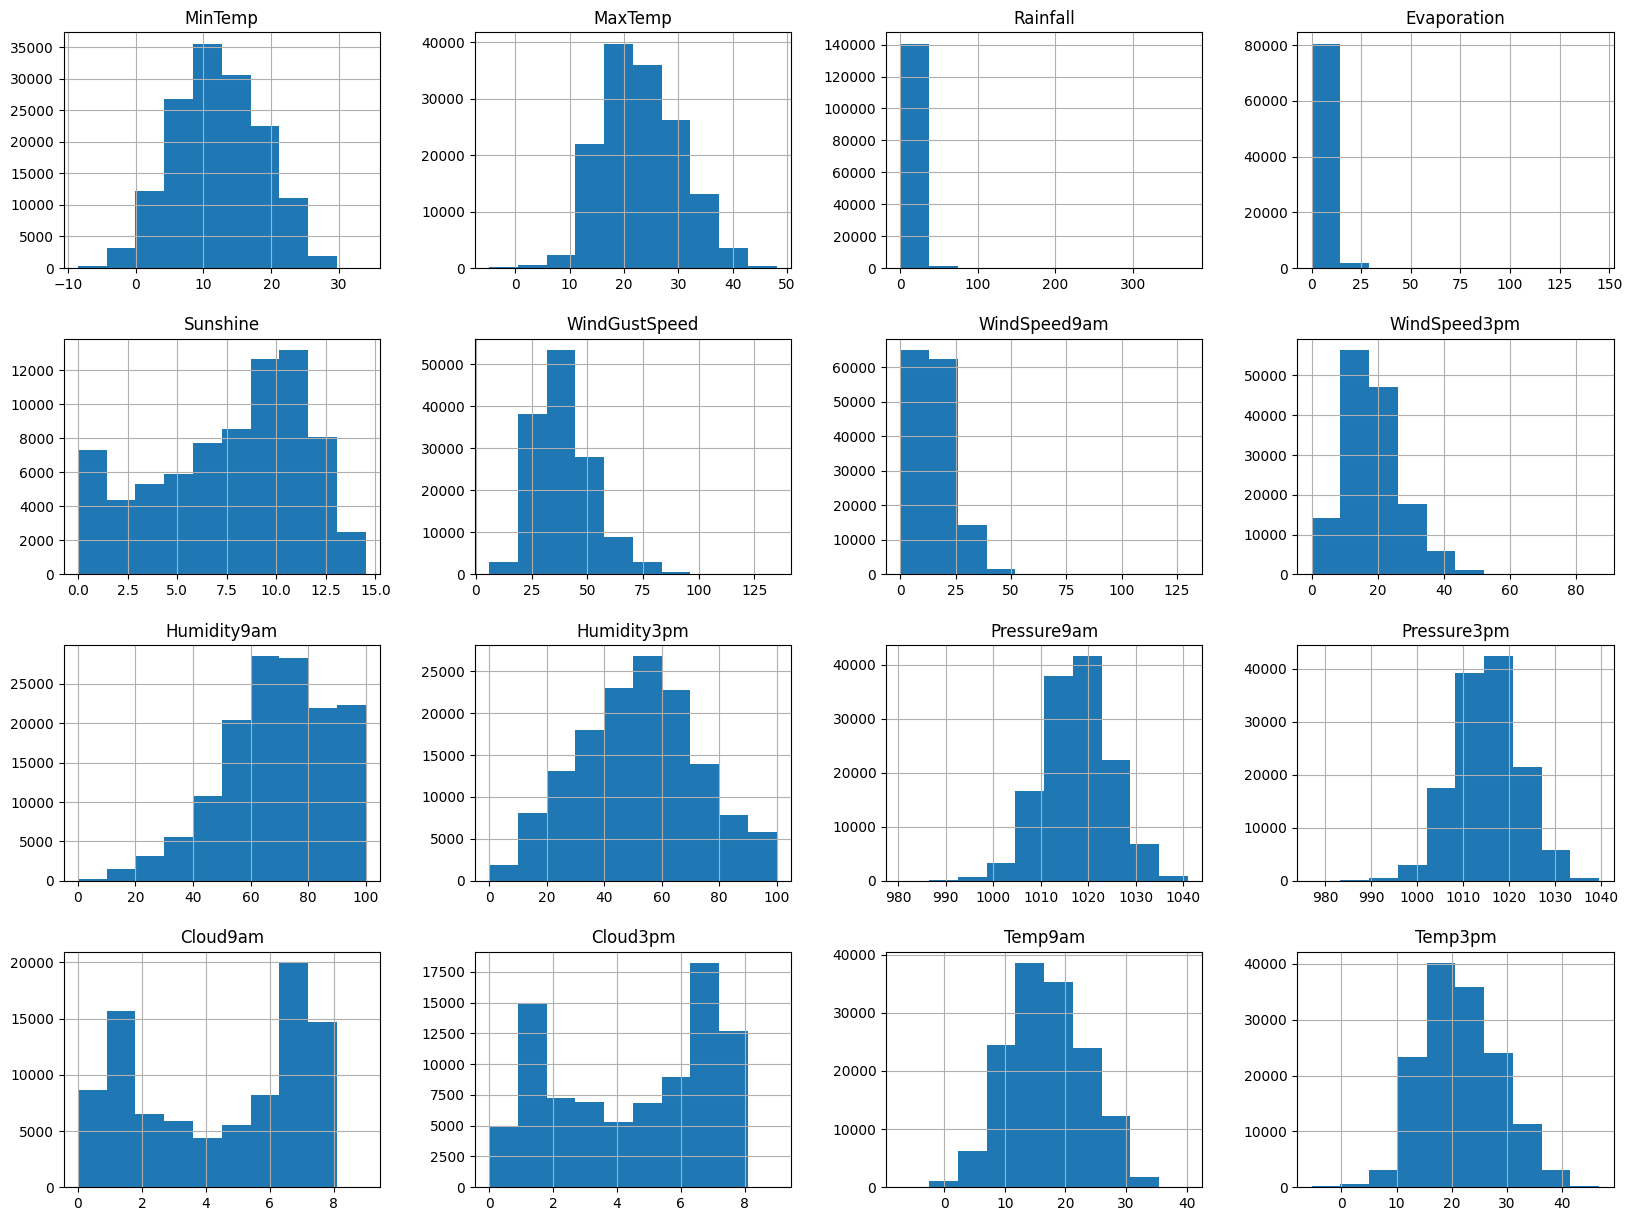

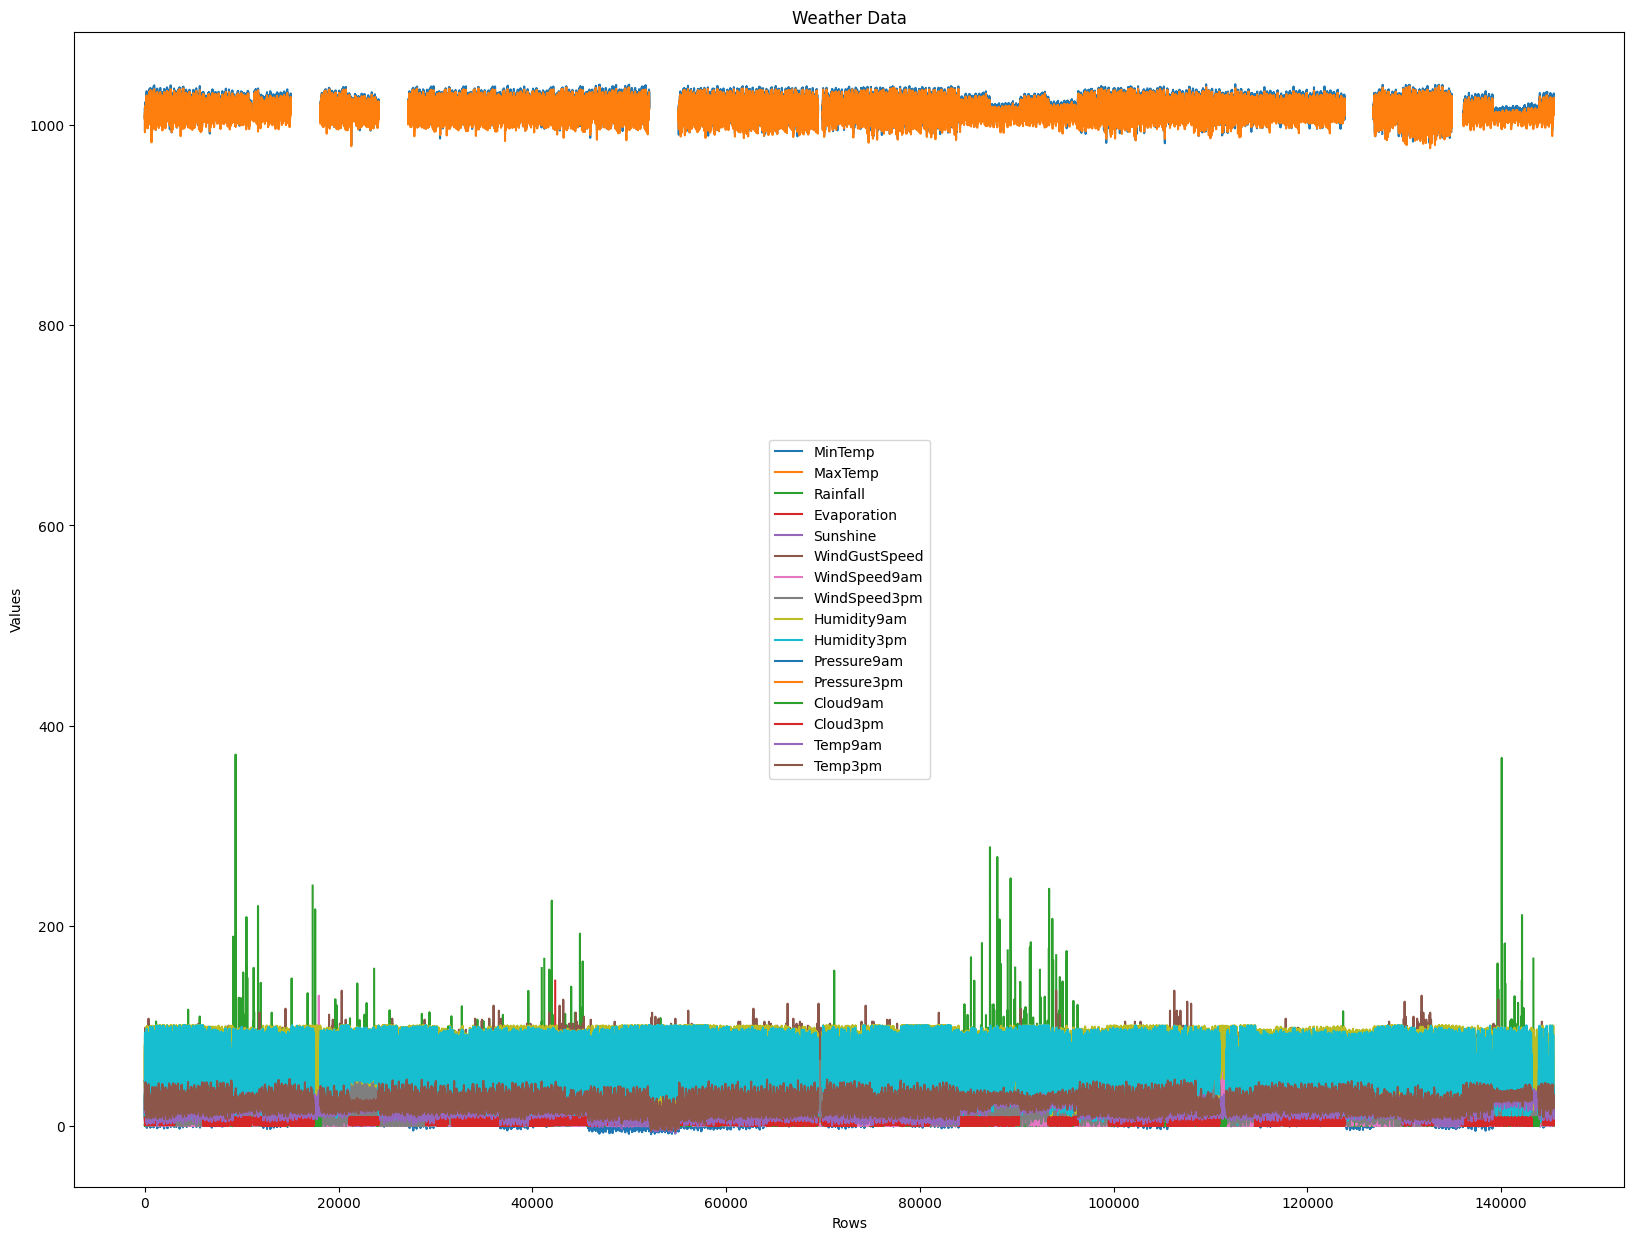

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Using a seed value of 12345
np.random.seed(12345)

# Discovering Data
weather_data = pd.read_csv('weatherAUS.csv')
print(weather_data.head())
print(weather_data.info())
print(weather_data.describe())

# Data Visualization and Find Some Blank Spaces in the Graphic
weather_data.hist(figsize=(20,15))

weather_data.plot(kind='line', figsize=(20, 15))
plt.xlabel('Rows')
plt.ylabel('Values')
plt.title('Weather Data')
plt.legend(loc='center')
plt.show()


# Cleaning Data and Checking Data
weather_data.dropna(inplace=True)
weather_data.info()





In [200]:

# We need to convert categorical variables
weather_data_process = pd.get_dummies(data=weather_data, columns=['WindDir9am', 'WindDir3pm', 'RainToday', 'WindGustDir'])
# Then do the same thing on target variable which is RainTomorrow
weather_data_process.replace(['No', 'Yes'], [0,1], inplace=True)

# Creating Train and Test Data
# Need to drop Date and Location
weather_data_process.drop('Date', axis=1, inplace=True)
weather_data_process.drop('Location', axis=1, inplace=True)

# To apply numerical operations we need to convert to float type
numeric_columns = weather_data_process.select_dtypes(include=['number']).columns
weather_data_process[numeric_columns] = weather_data_process[numeric_columns].astype(float)

# X is features, Y is target variable
X = weather_data_process.drop(columns='RainTomorrow', axis=1)
Y = weather_data_process['RainTomorrow']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


# 5-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
A = X.values
B = Y.values

# Initialize KFold with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = LinearRegression()

# Perform K-Fold Cross Validation
fold_scores = []
for train_index, test_index in kfold.split(A):
    x_train, x_test = A[train_index], A[test_index]
    y_train, y_test = B[train_index], B[test_index]
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # Calculate RMSE (Root Mean Squared Error) for each fold
    fold_score = mean_squared_error(y_test, y_pred, squared=False)  # squared=False for RMSE
    fold_scores.append(fold_score)

# Calculate and print the mean RMSE score across all folds
mean_score = sum(fold_scores) / len(fold_scores)
print("Mean RMSE Score:", mean_score)

Mean RMSE Score: 0.32933827042595454


KNN_Accuracy_Score: 0.837734845799362
KNN_F1_Score: 0.5974939547153221
KNN_Precision 0.5444711538461539
KNN_Recall 0.6619581100828057
KNN_Accuracy_Score: 0.84
KNN_F1_Score: 0.60
KNN_Precision 0.54
KNN_Recall 0.66


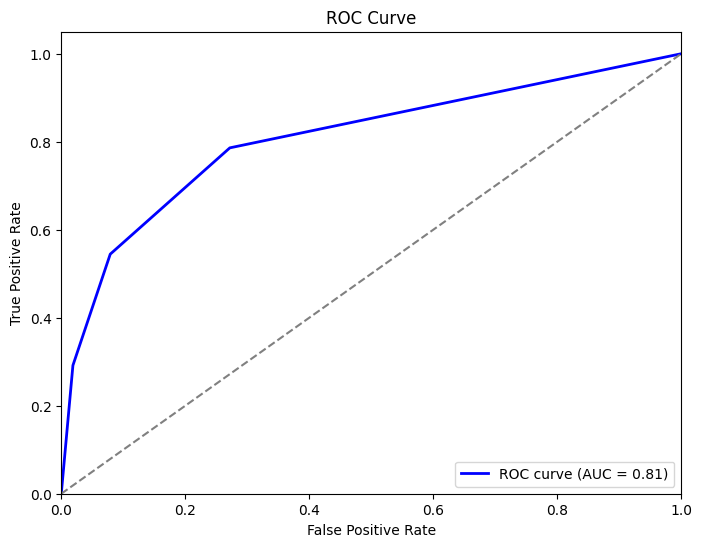

In [201]:
# KNN with K=3 and Calculation Accuracy F1 Precision Recall
from sklearn.neighbors import KNeighborsClassifier
K = 3
KNN = KNeighborsClassifier(n_neighbors = K)
KNN.fit(x_train,y_train)

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
import sklearn.metrics as metrics

predictions = KNN.predict(x_test)

KNN_Accuracy_Score = metrics.accuracy_score(predictions, y_test)
KNN_F1_Score = metrics.f1_score(predictions, y_test)
precision = metrics.precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
print("KNN_Accuracy_Score:" , KNN_Accuracy_Score)
print("KNN_F1_Score:" , KNN_F1_Score)
print("KNN_Precision", precision)
print("KNN_Recall", recall)
# Using just 2 number after point
print("KNN_Accuracy_Score: %.2f" % KNN_Accuracy_Score)
print("KNN_F1_Score: %.2f" % KNN_F1_Score)
print("KNN_Precision %.2f" % precision)
print("KNN_Recall %.2f" % recall)


# ROC-AUC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Make predictions on the test set and calculate probabilities
y_pred_proba = KNN.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Train set: (45136, 66) (45136,)
Test set: (11284, 66) (11284,)
LR_Accuracy_Score: 0.8536866359447005
LR_F1_Score: 0.6159571993486858
LR_Recall: 0.7343316694398225
LR_Precision: 0.530448717948718
LR_Accuracy_Score: 0.85
LR_F1_Score: 0.62
LR_Recall: 0.73
LR_Precision: 0.53


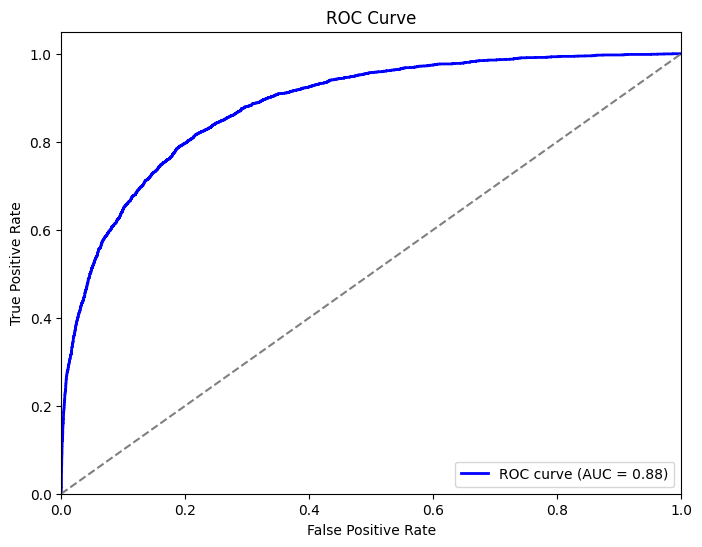

In [202]:
# Logistic Regression and Calculation Accuracy F1 Precision Recall

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

LR = LogisticRegression(solver = "liblinear")
LR.fit(x_train,y_train)

predictions = LR.predict(x_test)

LR_Accuracy_Score = metrics.accuracy_score(predictions, y_test)
LR_F1_Score = metrics.f1_score(predictions, y_test)
LR_Recall = recall_score(predictions, y_test)
LR_Precision = metrics.precision_score(predictions, y_test)
print("LR_Accuracy_Score:" , LR_Accuracy_Score)
print("LR_F1_Score:", LR_F1_Score)
print("LR_Recall:", LR_Recall)
print("LR_Precision:" ,LR_Precision)


# Using just 2 number after point 
print("LR_Accuracy_Score: %.2f" % LR_Accuracy_Score)
print("LR_F1_Score: %.2f" % LR_F1_Score)
print("LR_Recall: %.2f" % LR_Recall)
print("LR_Precision: %.2f" % LR_Precision)

# ROC-AUC curve
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

# Make predictions on the test set and calculate probabilities
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [203]:
# Perceptron



class Perceptron:

    def __init__(self, n_features=3, weights=None, bias=0, 
                 epoch=100, alpha=0.1):
        self.weights = np.zeros(n_features) if weights == None else weights
        self.bias = bias
        self.epoch = epoch
        self.alpha = alpha
        
    #methods
    def weighted_sum(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def activation(self, sum_):
        return (sum_ >= 0).astype(int)
    
    def predict(self, X):
        return self.activation(self.weighted_sum(X))
    
    def compute_error(self, X, y):
        return  y-self.predict(X)
    
    def update_weights(self, error, X):
        for xi, errori in zip(X, error):
            self.weights += errori * xi * self.alpha
            self.bias += errori * self.alpha
            
    def fit(self, X, y):
        for i in range(self.epoch):
            error = self.compute_error(X, y)
            self.update_weights(error, X)
            print(f'{i} error : {np.mean(error)}')
X=X.astype(int)
y=Y.astype(int)
X = (X-X.mean())/X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
per = Perceptron(n_features=X.shape[1])
from sklearn.metrics import accuracy_score
accuracy_score(y_test, per.predict(X_test))



0.22090337826950965

*Your Discussion Here*
First, I opened the data through the pandas library, then I examined the data, I saw that some parts in the data were not measured and I discarded them with the dropna command, then I converted the properties that did not have a number value to a number ('WindDir9am', 'WindDir3pm', 'RainToday', 'WindGustDir' ) and assigned 1 and 0 to our target property, RainTomorrow. I removed the date and location column, which will not be of any use to us from now on. To obtain more accurate results in numerical operations, I converted all values to decimal numbers(float). I divided my data into X (feature) and Y (target). I divided these values into two: train and test. I increased the accuracy by doing Cross Validation. I applied the KNN algorithm to this data, drew ROC Curve and calculated AUC (0.81). Then I applied Logistic Regression, drew ROC Curve and calculated AUC (0.88). Finally, I applied the Perceptron algorithm and the result was not very satisfactory. As a result, it would be correct to say that Logistic Regression is the best option by looking at both the AUC and F1 score and Recall values in this data (KNN achieved a better score only in Precision value). Logistic regression works very well because the response variable is binary but the explanatory variables are continuous. 

# Part II: Gradient Descent Implementation
1. The "House Rent Prediction Dataset" should be downloaded from the Kaggle website https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
2. Implement the gradient descent algorithm without using of any libraries
except for Pandas and NumPy. [10 points]
3. How many iteration step needs to converge with learning rate [0.01, 0.1,
1]? Devise an intelligent strategy for choosing the learning rate to reduce
the number of iterations required for convergence. Show how the learning
rate that you propose impacts the convergence of the gradient descent
algorithm. Show on the graph how the cost function changes with the
number of iterations and how the gradient descent converges. [20 points]


In [204]:
import pandas as pd
import numpy as np
data = pd.read_csv('House_Rent_Dataset.csv')



# Extract features (X) and target variable (y)
X = data[['Size', 'Bathroom']].values  # Example features
y = data['Rent'].values  # Target variable

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Initialize parameters
theta = np.zeros(X.shape[1] + 1)  # +1 for bias
alpha = 0.01  # Learning rate
num_epochs = 300

# Gradient Descent algorithm
m = len(y)  # Number of data points
cost_history = []

for epoch in range(num_epochs):
    # Predictions
    X_with_bias = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add bias to X
    y_pred = np.dot(X_with_bias, theta)
    
    # Cost calculation (MSE)
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    cost_history.append(cost)
    
    # Gradient calculation and parameter update
    gradients = np.dot(X_with_bias.T, y_pred - y) / m
    theta -= alpha * gradients

# Print the optimized parameters
print("Optimized parameters:", theta)





X = data[['Size', 'Bathroom']] # Example features
y = data['Rent'] # Target variable

# Gradient Descent parameters
theta = np.zeros(X.shape[1])  
learning_rate = 0.01  
num_iterations = 100 # Maximum Iteration
convergence_threshold = 0.01  
previous_cost = float('inf')  

# Gradient Descent
for i in range(num_iterations):
    
    predictions = np.dot(X, theta)
    
    
    errors = predictions - y
    cost = np.sum(errors**2) / (2 * len(y))
    
    # Convergence
    if abs(cost - previous_cost) < convergence_threshold:
        print(f"Converge after {i} iteration steps")
        break
    
    # Update Parameters
    gradient = np.dot(X.T, errors) / len(y)
    theta -= learning_rate * gradient
    
    
    previous_cost = cost



Optimized parameters: [33277.3411877  16821.83295766 21330.36726806]
Converge after 75 iteration steps


C:\Users\seyme\AppData\Local\Temp\ipykernel_5816\1442426613.py:63: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(cost - previous_cost) < convergence_threshold:
C:\Users\seyme\AppData\Local\Temp\ipykernel_5816\1442426613.py:69: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


In [205]:
import pandas as pd
import numpy as np
data = pd.read_csv('House_Rent_Dataset.csv')



# Extract features (X) and target variable (y)
X = data[['Size', 'Bathroom']].values  # Example features
y = data['Rent'].values  # Target variable

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Initialize parameters
theta = np.zeros(X.shape[1] + 1)  # +1 for bias
alpha = 0.1  # Learning rate
num_epochs = 1000

# Gradient Descent algorithm
m = len(y)  # Number of data points
cost_history = []

for epoch in range(num_epochs):
    # Predictions
    X_with_bias = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add bias to X
    y_pred = np.dot(X_with_bias, theta)
    
    # Cost calculation (MSE)
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    cost_history.append(cost)
    
    # Gradient calculation and parameter update
    gradients = np.dot(X_with_bias.T, y_pred - y) / m
    theta -= alpha * gradients

# Print the optimized parameters
print("Optimized parameters:", theta)





X = data[['Size', 'Bathroom']] # Example features
y = data['Rent'] # Target variable

# Gradient Descent parameters
theta = np.zeros(X.shape[1])  
learning_rate = 0.1  
num_iterations = 100 # Maximum Iteration
convergence_threshold = 0.01  
previous_cost = float('inf')  

# Gradient Descent
for i in range(num_iterations):
    
    predictions = np.dot(X, theta)
    
    
    errors = predictions - y
    cost = np.sum(errors**2) / (2 * len(y))
    
    # Convergence
    if abs(cost - previous_cost) < convergence_threshold:
        print(f"Converge after {i} iteration steps")
        break
    
    # Update Parameters
    gradient = np.dot(X.T, errors) / len(y)
    theta -= learning_rate * gradient
    
    
    previous_cost = cost





Optimized parameters: [34993.45132743 15008.75712544 23341.07598537]
Converge after 61 iteration steps


C:\Users\seyme\AppData\Local\Temp\ipykernel_5816\4067512622.py:63: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(cost - previous_cost) < convergence_threshold:
C:\Users\seyme\AppData\Local\Temp\ipykernel_5816\4067512622.py:69: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


In [206]:
import pandas as pd
import numpy as np
data = pd.read_csv('House_Rent_Dataset.csv')



# Extract features (X) and target variable (y)
X = data[['Size', 'Bathroom']].values  # Example features
y = data['Rent'].values  # Target variable

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Initialize parameters
theta = np.zeros(X.shape[1] + 1)  # +1 for bias
alpha = 1  # Learning rate
num_epochs = 10

# Gradient Descent algorithm
m = len(y)  # Number of data points
cost_history = []

for epoch in range(num_epochs):
    # Predictions
    X_with_bias = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add bias to X
    y_pred = np.dot(X_with_bias, theta)
    
    # Cost calculation (MSE)
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    cost_history.append(cost)
    
    
    # Gradient calculation and parameter update
    gradients = np.dot(X_with_bias.T, y_pred - y) / m
    theta -= alpha * gradients

# Print the optimized parameters
print("Optimized parameters:", theta)


X = data[['Size', 'Bathroom']] # Example features
y = data['Rent'] # Target variable

# Gradient Descent parameters
theta = np.zeros(X.shape[1])  
learning_rate = 1  
num_iterations = 100 # Maximum Iteration
convergence_threshold = 0.01  
previous_cost = float('inf')  

# Gradient Descent
for i in range(num_iterations):
    
    predictions = np.dot(X, theta)
    
    
    errors = predictions - y
    cost = np.sum(errors**2) / (2 * len(y))
    
    # Convergence
    if abs(cost - previous_cost) < convergence_threshold:
        print(f"Converge after {i} iteration steps")
        break
    
    # Update Parameters
    gradient = np.dot(X.T, errors) / len(y)
    theta -= learning_rate * gradient
    
    
    previous_cost = cost



Optimized parameters: [34993.45132743 14262.67605517 22180.79770207]
Converge after 52 iteration steps


C:\Users\seyme\AppData\Local\Temp\ipykernel_5816\1454931007.py:61: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(cost - previous_cost) < convergence_threshold:
C:\Users\seyme\AppData\Local\Temp\ipykernel_5816\1454931007.py:67: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


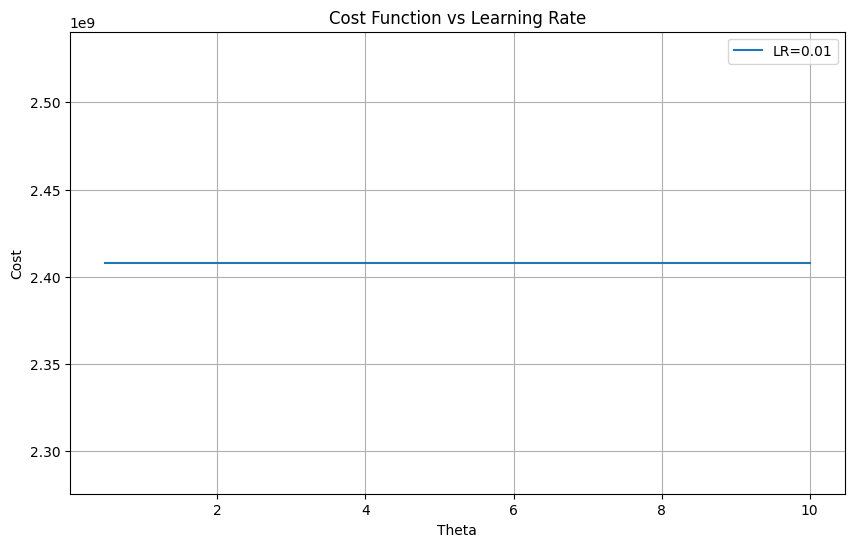

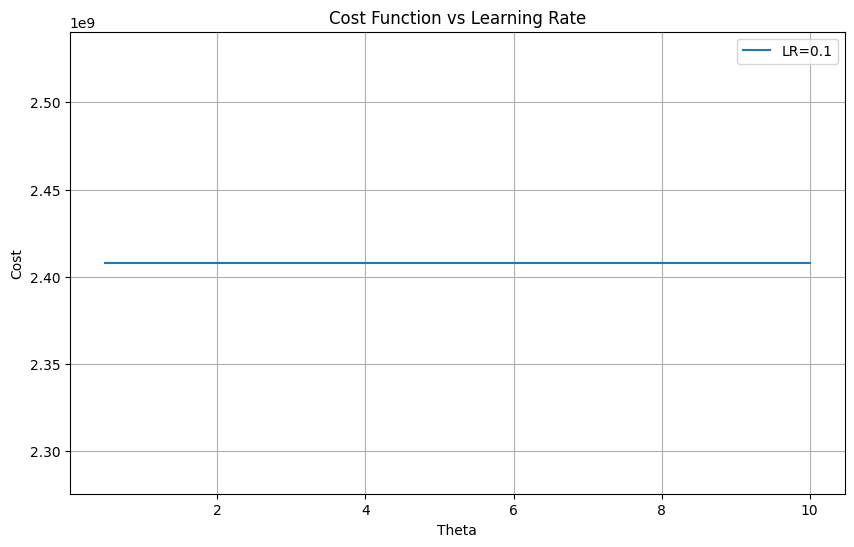

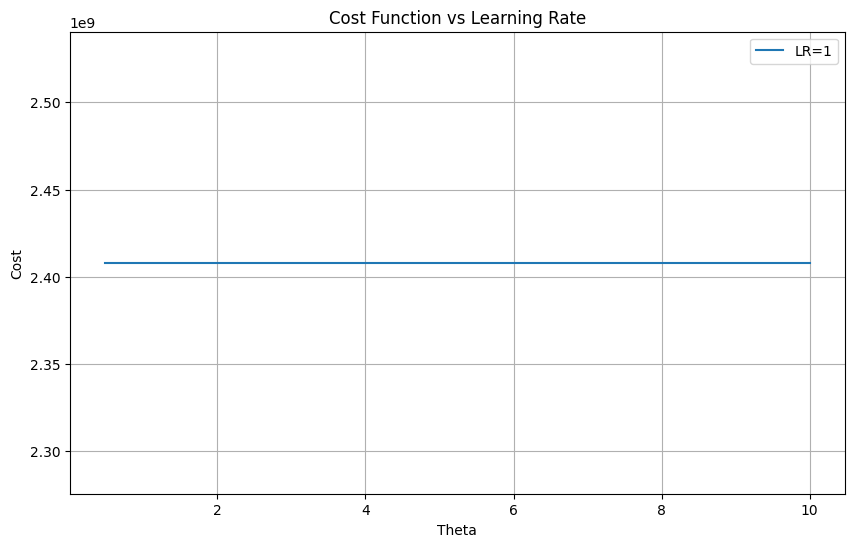

In [207]:
import numpy as np
import matplotlib.pyplot as plt

cost = np.sum((y_pred - y) ** 2) / (2 * m) 


learning_rates = [0.01]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    costs = [cost for theta in theta_values]  

    plt.plot(theta_values, costs, label=f'LR={lr}')

plt.xlabel('Theta')
plt.ylabel('Cost')
plt.title('Cost Function vs Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

learning_rates = [0.1]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    costs = [cost for theta in theta_values]  

    plt.plot(theta_values, costs, label=f'LR={lr}')

plt.xlabel('Theta')
plt.ylabel('Cost')
plt.title('Cost Function vs Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


learning_rates = [1]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    costs = [cost for theta in theta_values]  

    plt.plot(theta_values, costs, label=f'LR={lr}')

plt.xlabel('Theta')
plt.ylabel('Cost')
plt.title('Cost Function vs Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


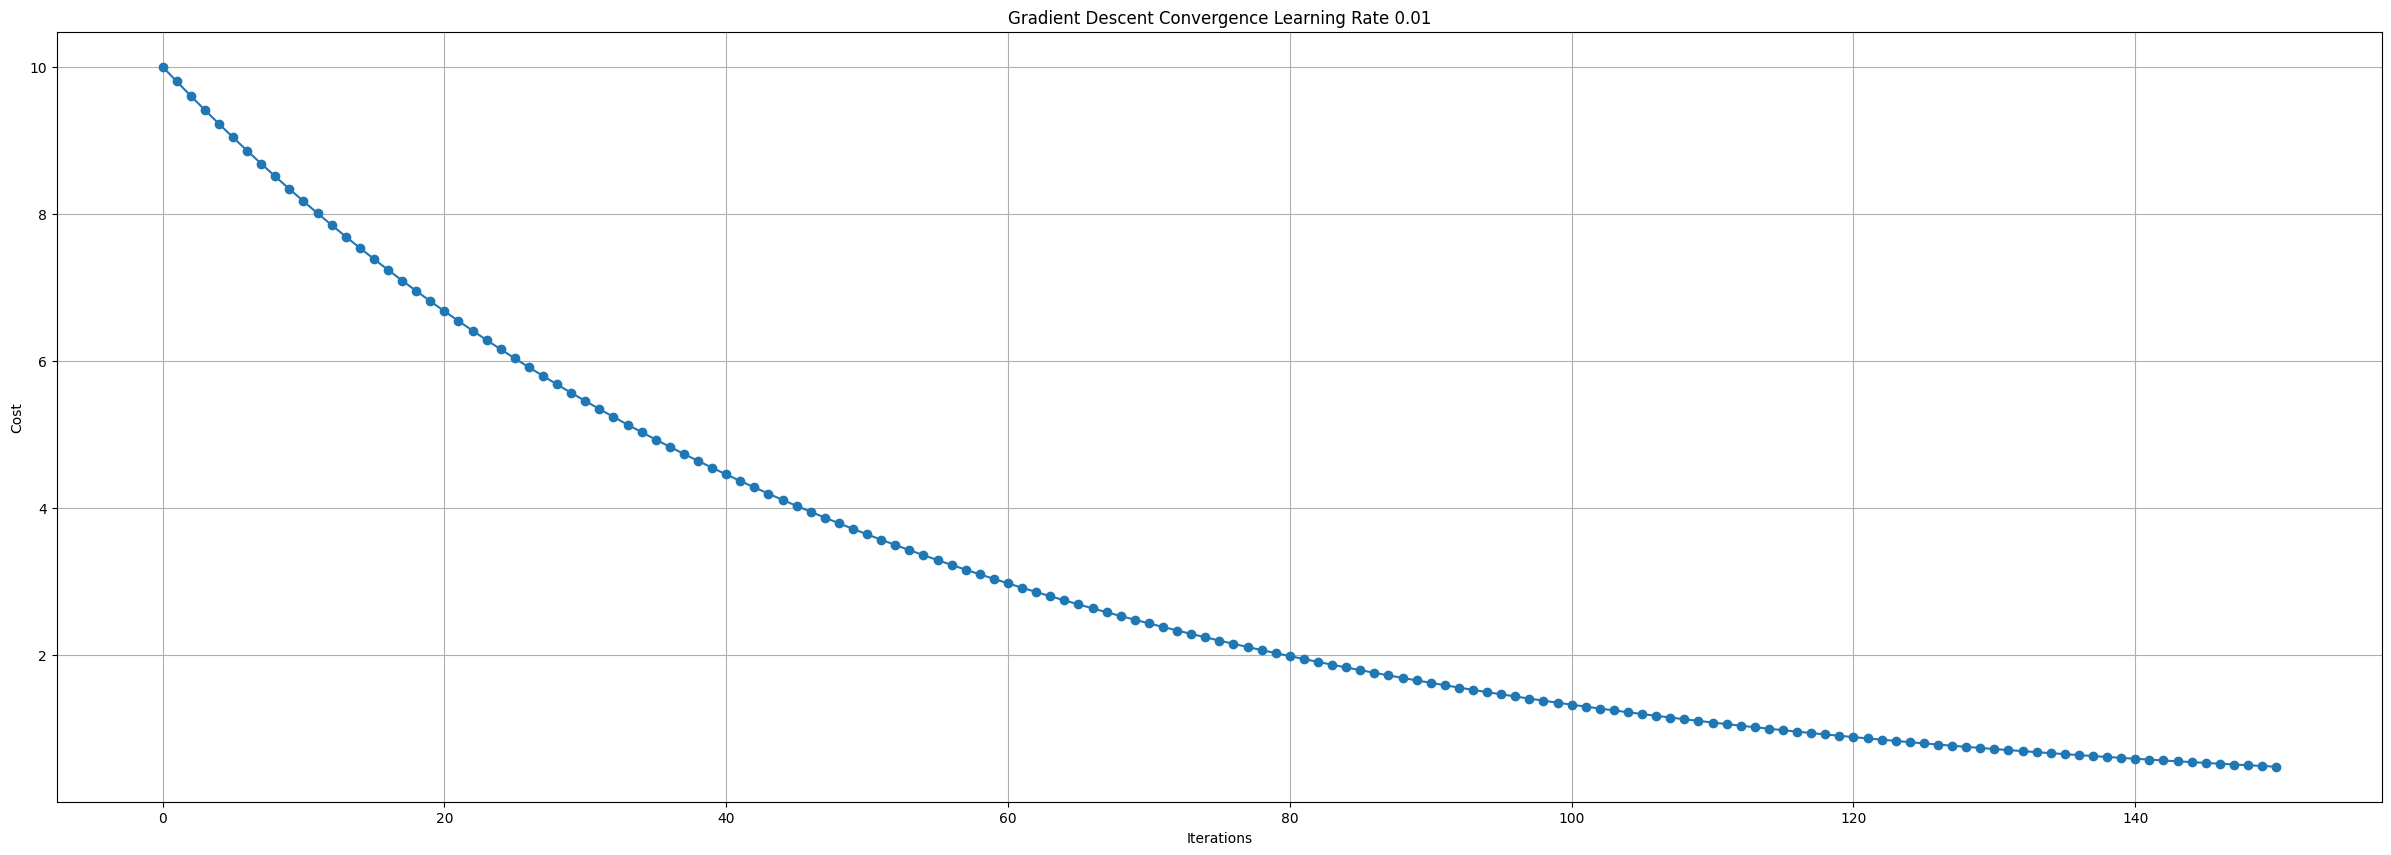

In [208]:
import numpy as np
import matplotlib.pyplot as plt



def cost_function(cost_history):
    
    return cost_history

def gradient_descent(learning_rate, num_iterations):
    theta = 10  
    theta_history = [theta]  
    cost_history = [cost_function(theta)]  

    for i in range(num_iterations):
        gradient = 2 * theta  
        theta -= learning_rate * gradient 
        theta_history.append(theta)
        cost_history.append(cost_function(theta))

    return theta_history, cost_history

learning_rate = 0.01
num_iterations = 150

theta_values, cost_values = gradient_descent(learning_rate, num_iterations)


plt.figure(figsize=(30, 10))
plt.plot(range(num_iterations + 1), cost_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence Learning Rate 0.01')
plt.grid(True)
plt.show()


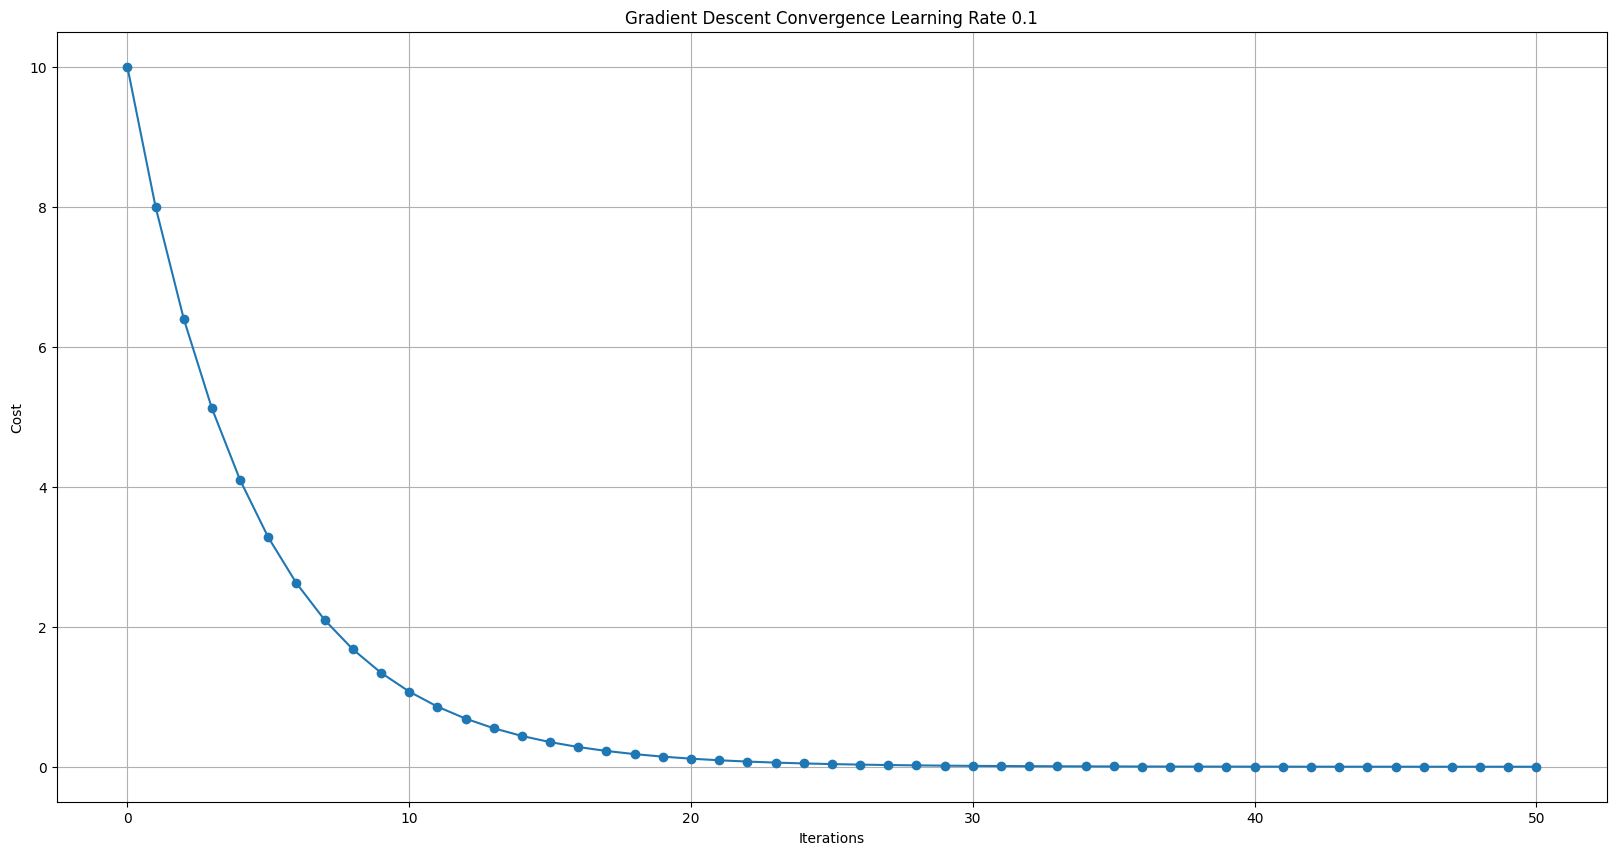

In [209]:
import numpy as np
import matplotlib.pyplot as plt




def cost_function(cost_history):
    
    return cost_history

def gradient_descent(learning_rate, num_iterations):
    theta = 10  
    theta_history = [theta]  
    cost_history = [cost_function(theta)]  

    for i in range(num_iterations):
        gradient = 2 * theta  
        theta -= learning_rate * gradient 
        theta_history.append(theta)
        cost_history.append(cost_function(theta))

    return theta_history, cost_history

learning_rate = 0.1
num_iterations = 50

theta_values, cost_values = gradient_descent(learning_rate, num_iterations)


plt.figure(figsize=(20, 10))
plt.plot(range(num_iterations + 1), cost_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence Learning Rate 0.1')
plt.grid(True)
plt.show()


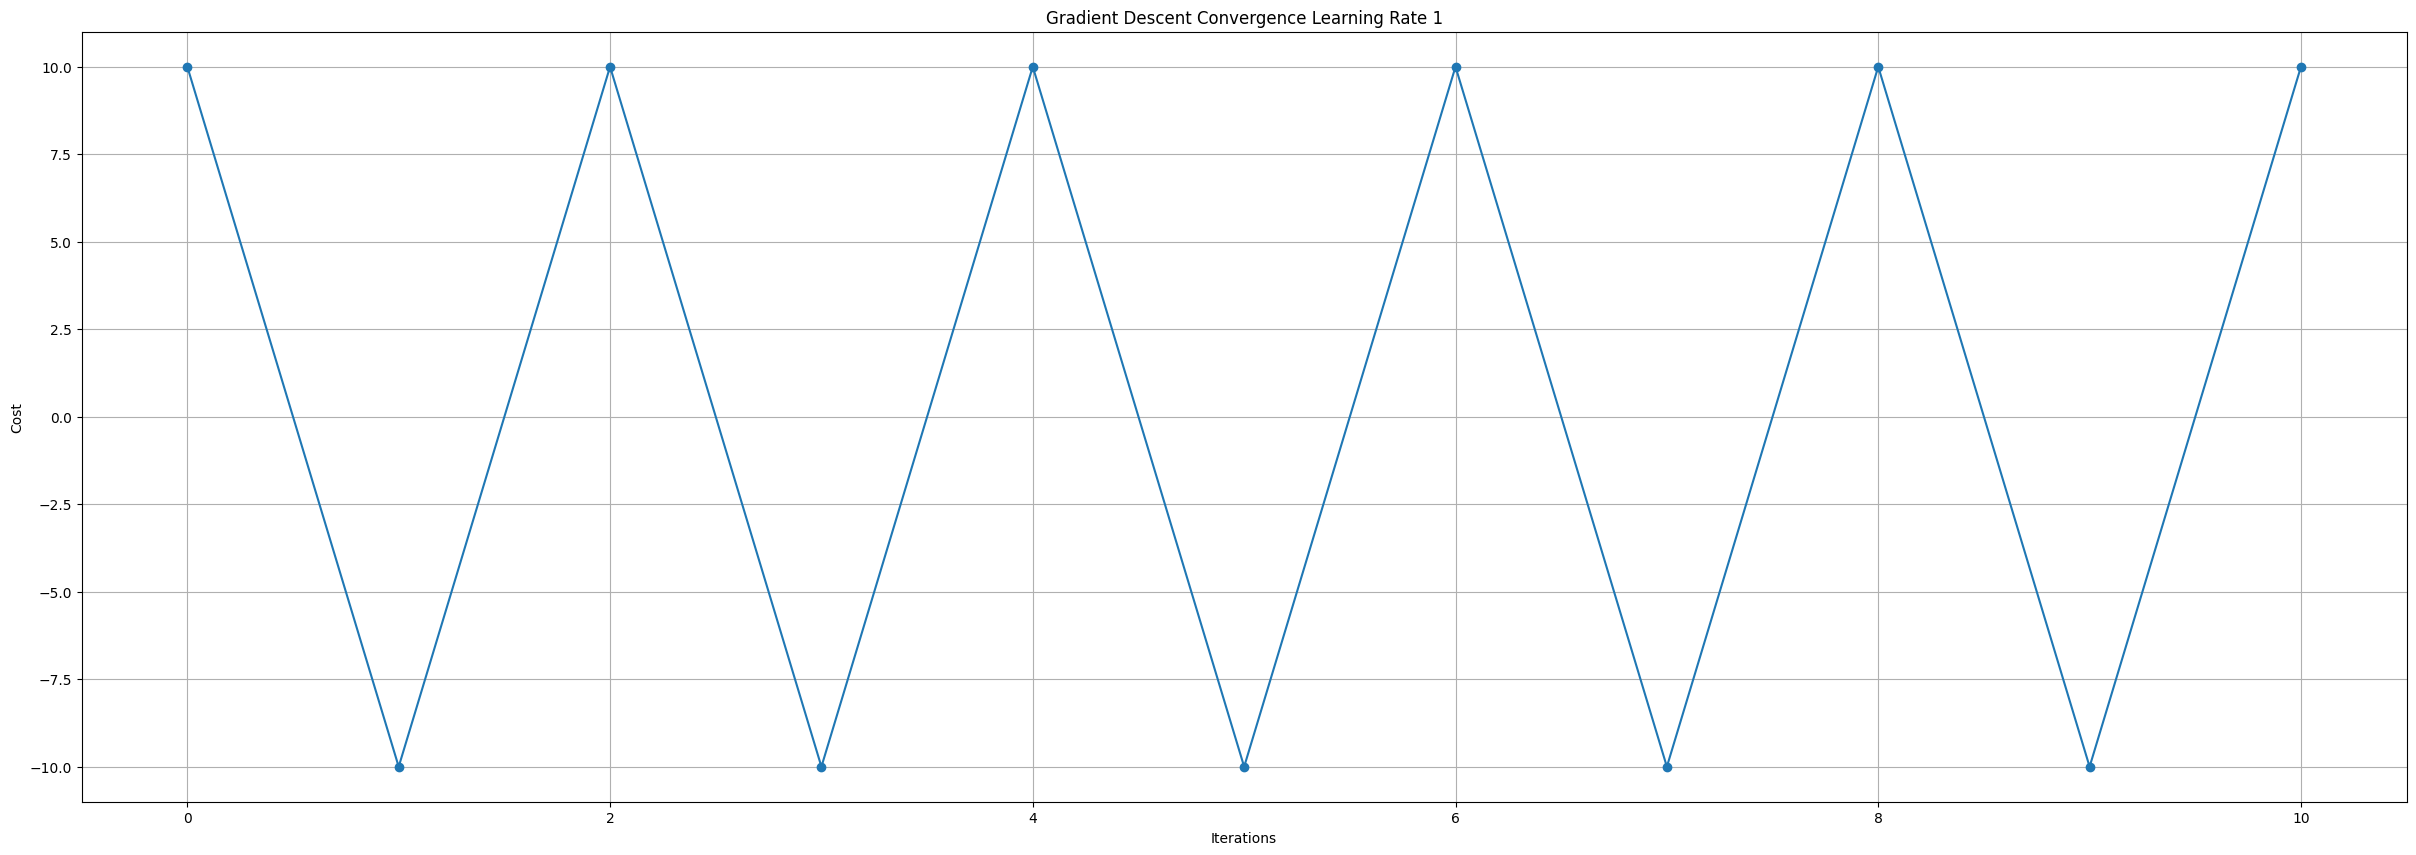

In [210]:
import numpy as np
import matplotlib.pyplot as plt



def cost_function(cost_history):
    
    return cost_history

def gradient_descent(learning_rate, num_iterations):
    theta = 10  
    theta_history = [theta]  
    cost_history = [cost_function(theta)]  

    for i in range(num_iterations):
        gradient = 2 * theta  
        theta -= learning_rate * gradient 
        theta_history.append(theta)
        cost_history.append(cost_function(theta))

    return theta_history, cost_history

learning_rate = 1.0
num_iterations = 10

theta_values, cost_values = gradient_descent(learning_rate, num_iterations)


plt.figure(figsize=(30, 10))
plt.plot(range(num_iterations + 1), cost_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence Learning Rate 1')
plt.grid(True)
plt.show()


*Your Discussion Here*
When we change to learning rate, the iteration steps we need to done is change, for instance when learning rate=0.01 we need 75 iteration step for convergence., when learning rate=0.1, we need 61 iteration step for convergence., when learning rate=1, we need 52 iteration step for convergence. The Gradient Descent algorithm is approaching the local minimum point with iterations, I showed this in the last graphs. As the learning rate changes, the convergence image also changes.